<a href="https://colab.research.google.com/github/subodhsd/Book-Recommendation-System/blob/main/Book_recomndation_system_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading dataset
Book_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dat/Books.csv")
rating_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dat/Ratings.csv")
user_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dat/Users.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Exploratory Data Analysis

### Book_df dataset

In [ ]:
# first 5 rows of Book_df dataset
Book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
#information about book_df dataset
Book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
#Checking duplicate observation
Book_df.duplicated().sum()

0

### Is there any repeated ISBN and Book-Title in the Book_df dataset

In [ ]:
total_rows=Book_df.shape[0]
unique_isbn=len(Book_df["ISBN"].unique())
repeated_isbn=total_rows-unique_isbn
unique_title=len(Book_df["Book-Title"].unique())
repeated_title=total_rows-unique_title
print(f'number of repeated isbn: {repeated_isbn}')
print(f'number of repeated isbn: {repeated_title}')

number of repeated isbn: 0
number of repeated isbn: 29225


In [ ]:
#checking null values
Book_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

### rating_df dataset

In [ ]:
#first 5 rows of rating_df dataset
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
#information about rating_df dataset
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
#Checking duplicate observation
rating_df.duplicated().sum()

0

In [ ]:
#checking null values
rating_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

### user_df dataset

In [ ]:
#first 5 rows of user_df dataset
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
#information about user_df dataset
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
#Checking duplicate observation
user_df.duplicated().sum()

0

In [ ]:
#checking null values
user_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

### Top 10 authors with highest numbers of book

In [ ]:
top_authors=Book_df.groupby('Book-Author').agg({'Book-Title':'count'}).sort_values(by="Book-Title",ascending=False).head(10).reset_index()
top_authors.rename(columns = {'Book-Author':'Author','Book-Title':"count"},inplace=True)

In [ ]:
top_authors

,Author,count
0,Agatha Christie,632
1,William Shakespeare,567
2,Stephen King,524
3,Ann M. Martin,423
4,Carolyn Keene,373
5,Francine Pascal,372
6,Isaac Asimov,330
7,Nora Roberts,315
8,Barbara Cartland,307
9,Charles Dickens,302


Text(0, 0.5, 'Number Of Books')

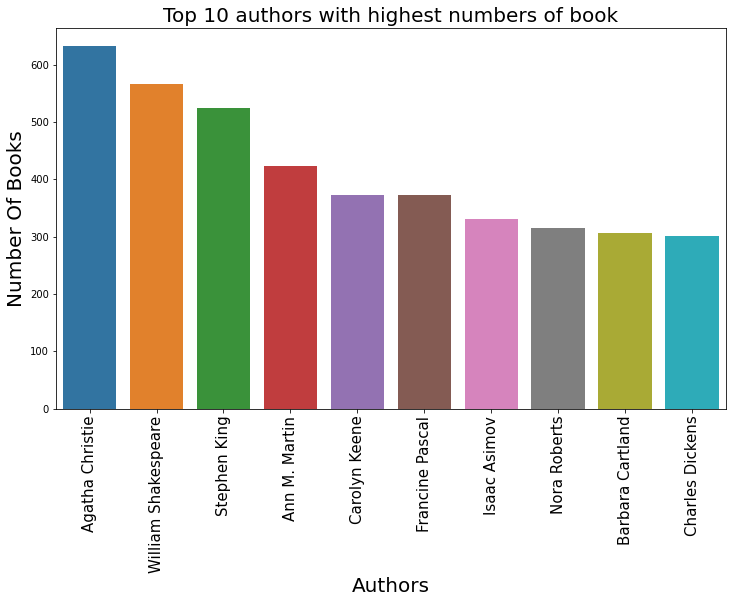

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(data=top_authors, x="Author", y="count")
plt.title("Top 10 authors with highest numbers of book",fontsize=20);
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Authors",fontsize=20)
plt.ylabel("Number Of Books",fontsize=20)
